<a href="https://colab.research.google.com/github/pb-roshith/Apple_Stock_Price_Forecasting_using_LSTM/blob/main/Apple_Stock_Price_Forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [40]:
!kaggle datasets download -d meetnagadia/apple-stock-price-from-19802021

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021
License(s): ODbL-1.0
  0% 0.00/206k [00:00<?, ?B/s]
100% 206k/206k [00:00<00:00, 439MB/s]


In [41]:
from zipfile import ZipFile
dataset='/content/apple-stock-price-from-19802021.zip'

with ZipFile(dataset, 'r') as zip_ref: # Renamed zip to zip_ref
  zip_ref.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('/content/AAPL.csv')

In [44]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [45]:
data.shape

(10468, 7)

In [46]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000


In [47]:
data.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [48]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [50]:
data['Date'] = pd.to_datetime(data['Date'])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [52]:
data.set_index('Date', inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [54]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000


In [55]:
data.sort_index(inplace=True)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_value = scaler.fit_transform(data[data.columns])

In [57]:
scaler_value

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

In [58]:
df = pd.DataFrame(scaler_value, columns=data.columns, index=data.index)

In [59]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246


In [60]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000
mean,0.080558,0.081316,0.081227,0.080866,0.077654,0.044579
std,0.174795,0.176549,0.176153,0.175474,0.174336,0.045656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001281,0.001310,0.001271,0.001288,0.001086,0.016678
50%,0.002325,0.002368,0.002328,0.002343,0.001951,0.029395
75%,0.081628,0.082057,0.081775,0.081627,0.070517,0.055322
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
def create_sequence(data, window_size):
  x = []
  y = []
  for i in range(window_size, len(data)):
    x.append(data.iloc[i - window_size : i].values)
    y.append(data.iloc[i].values)
  return np.array(x), np.array(y)

In [65]:
window_size = 60
x, y = create_sequence(df, window_size)

In [66]:
x.shape, y.shape

((10408, 60, 6), (10408, 6))

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8326, 60, 6), (2082, 60, 6), (8326, 6), (2082, 6))

In [73]:
import tensorflow as tf

In [74]:
x_train.shape[1], x_train.shape[2]

(60, 6)

In [75]:
y_train.shape[1]

6

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(y_train.shape[1])
])

In [77]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['RootMeanSquaredError'])

In [78]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  restore_best_weights=True)

In [80]:
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - RootMeanSquaredError: 0.0283 - loss: 8.0448e-04 - val_RootMeanSquaredError: 0.0191 - val_loss: 3.6561e-04
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - RootMeanSquaredError: 0.0286 - loss: 8.1981e-04 - val_RootMeanSquaredError: 0.0179 - val_loss: 3.1958e-04
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - RootMeanSquaredError: 0.0271 - loss: 7.3389e-04 - val_RootMeanSquaredError: 0.0175 - val_loss: 3.0752e-04
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - RootMeanSquaredError: 0.0258 - loss: 6.6885e-04 - val_RootMeanSquaredError: 0.0176 - val_loss: 3.0977e-04
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - RootMeanSquaredError: 0.0263 - loss: 6.9336e-04 - val_RootMeanSquaredError: 0.0177 - val_loss: 3.1240e-04
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - RootMeanSquaredError: 0.0257 - loss: 6.6337e-04 - val_RootMeanSquaredError: 0.0180 - val_loss: 3.2484e-04
Epoch 7/100
209/209 ━━━━━━━━

In [81]:
predictions = model.predict(x_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [82]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

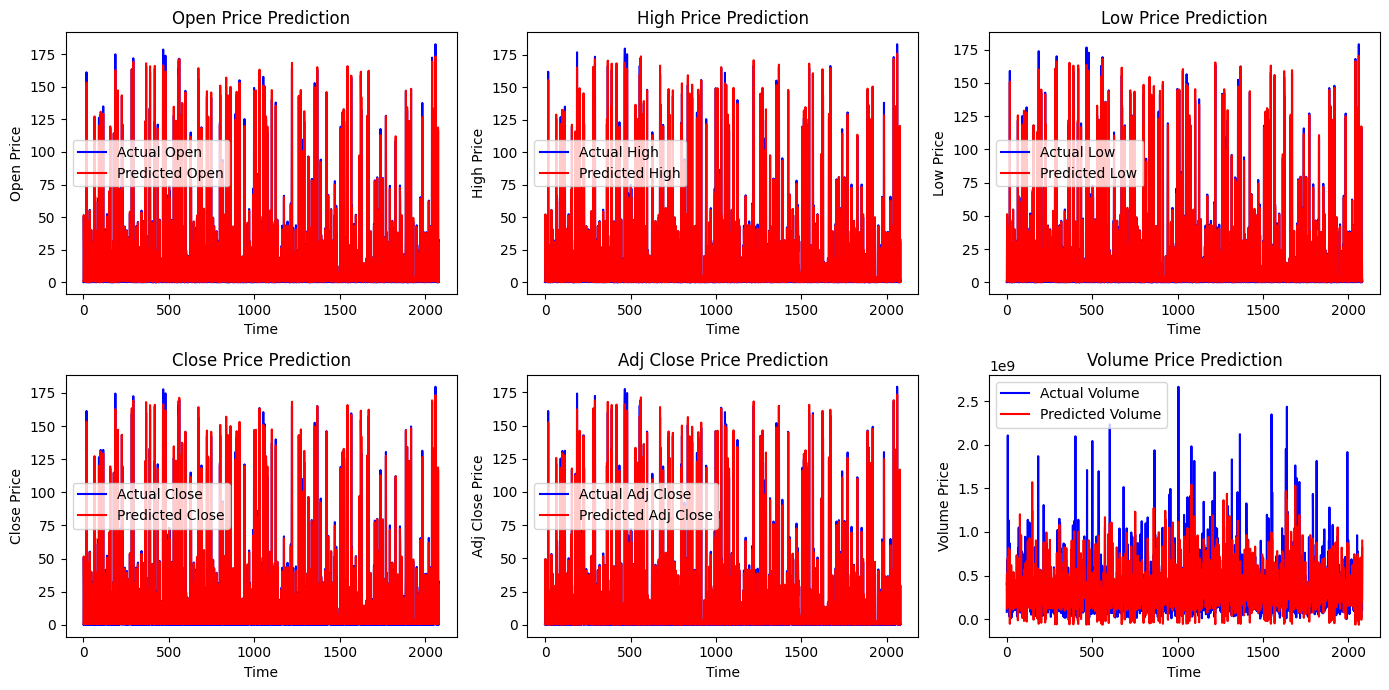

In [83]:
plt.figure(figsize=(14, 7))

for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()